## **Important Libraries and Data**

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [2]:
#reading data
df = pd.read_csv("NBA_Dataset_csv.csv")
df_=df.copy()

## **Navigating the Data**

In [3]:
df_.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


**Data Dictionary**

* Team: name of the team
* Points_Scored: points scored by the team
* Weightlifting_Sessions_Average: weighlifting sessions on an average done by the team
* Yoga_Sessions_Average: yoga sessions on an average done by the team
* Laps_Run_Per_Practice_Average: laps run on an average by the team
* Water_Intake: total water intake
* Players_Absent_For_Sessions: number of players absent for sessions



In [4]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


* We can see that the full dataset contains 159 row, one categorical variable which is the Team Name and 6 numerical variables.
* There are missing values within the variable which we will deal with in the next steps.

In [5]:
df_.rename(columns={'Points_Scored':'Score',
                    "Weightlifting_Sessions_Average":"WSA",
                    "Yoga_Sessions_Average":"YA",
                    "Laps_Run_Per_Practice_Average":"LPA",
                    "Water_Intake":"WI","Players_Absent_For_Sessions":"PAS"},inplace=True)

In [6]:
df_.describe([0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T


,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
Score,159.0,119.327044,52.354983,0.0,10.0,96.5,125.0,151.5,197.30,245.36,250.0
WSA,150.0,7433.120000,90719.720242,8.0,11.0,19.0,24.0,33.0,42.55,57.53,1111111.0
YA,139.0,21.690647,11.439728,3.0,8.9,13.0,19.0,28.0,45.10,60.00,63.0
LPA,145.0,30.972414,11.979117,9.0,13.0,23.0,29.0,40.0,47.80,64.00,68.0
WI,145.0,3.648276,1.804820,1.0,1.0,2.0,3.0,5.0,7.00,7.56,8.0
PAS,130.0,4.415385,2.202129,1.0,1.0,3.0,4.0,6.0,8.00,8.00,8.0


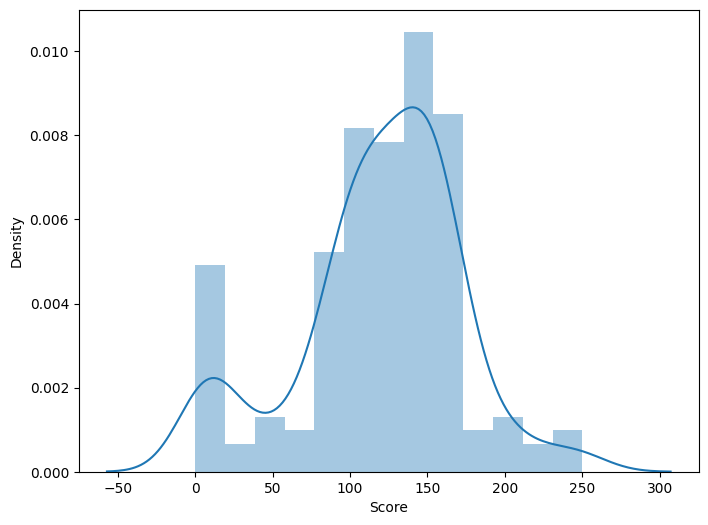

In [7]:
fig=plt.figure(figsize=(8,6))
sns.distplot(df_['Score'],kde=True)
plt.show()

2024-12-30 06:11:27,146 - INFO - Outliers detected in Score. Proceeding with analysis and replacement.


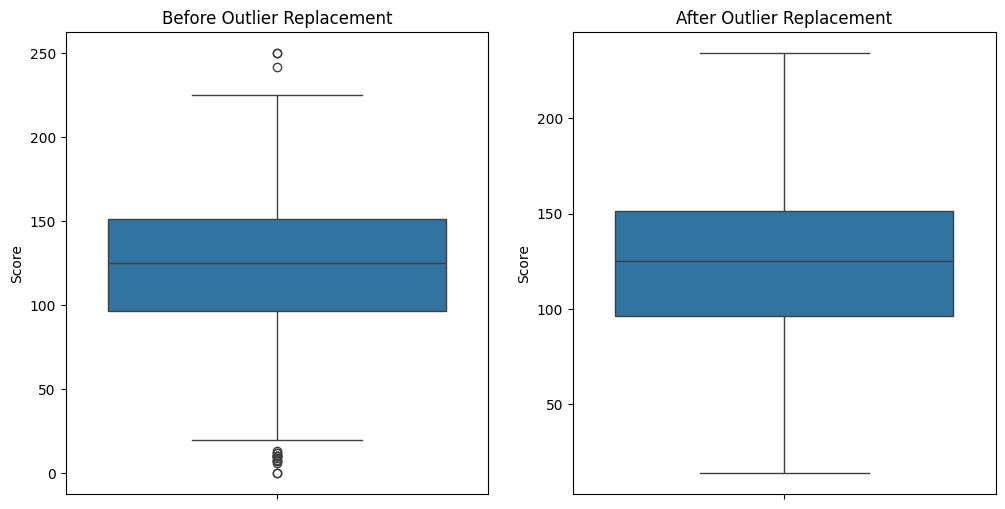

2024-12-30 06:11:27,313 - INFO - Replaced outliers in 'Score' with thresholds: 14.0, 234.0
2024-12-30 06:11:27,313 - INFO - Outlier replacement completed for Score.
2024-12-30 06:11:27,313 - INFO - Outliers detected in WSA. Proceeding with analysis and replacement.


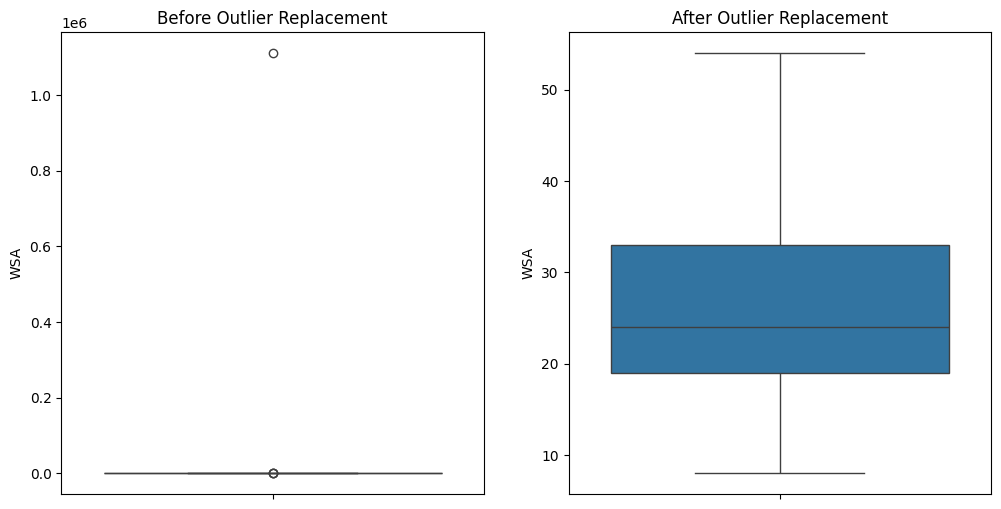

2024-12-30 06:11:27,480 - INFO - Replaced outliers in 'WSA' with thresholds: -2.0, 54.0
2024-12-30 06:11:27,480 - INFO - Outlier replacement completed for WSA.
2024-12-30 06:11:27,482 - INFO - Outliers detected in YA. Proceeding with analysis and replacement.


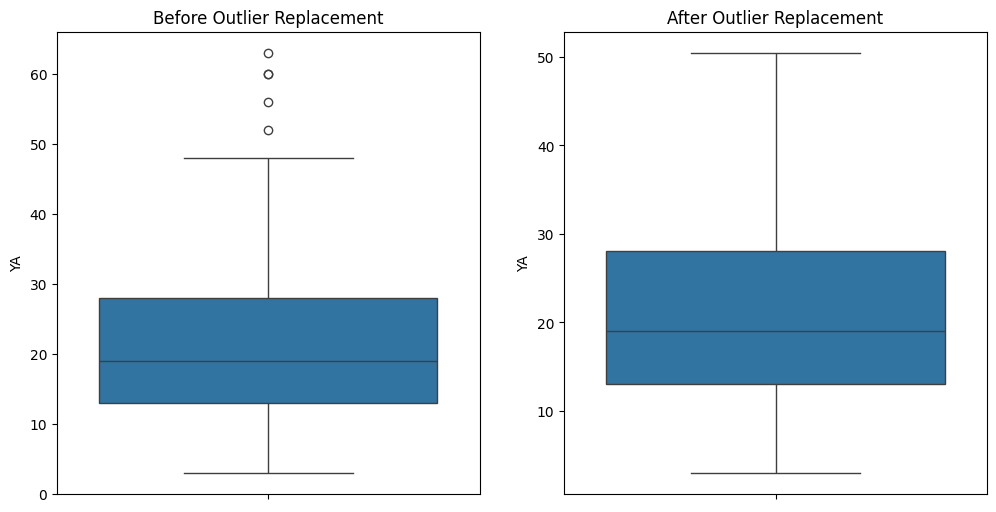

2024-12-30 06:11:27,627 - INFO - Replaced outliers in 'YA' with thresholds: -9.5, 50.5
2024-12-30 06:11:27,627 - INFO - Outlier replacement completed for YA.
2024-12-30 06:11:27,627 - INFO - Outliers detected in LPA. Proceeding with analysis and replacement.


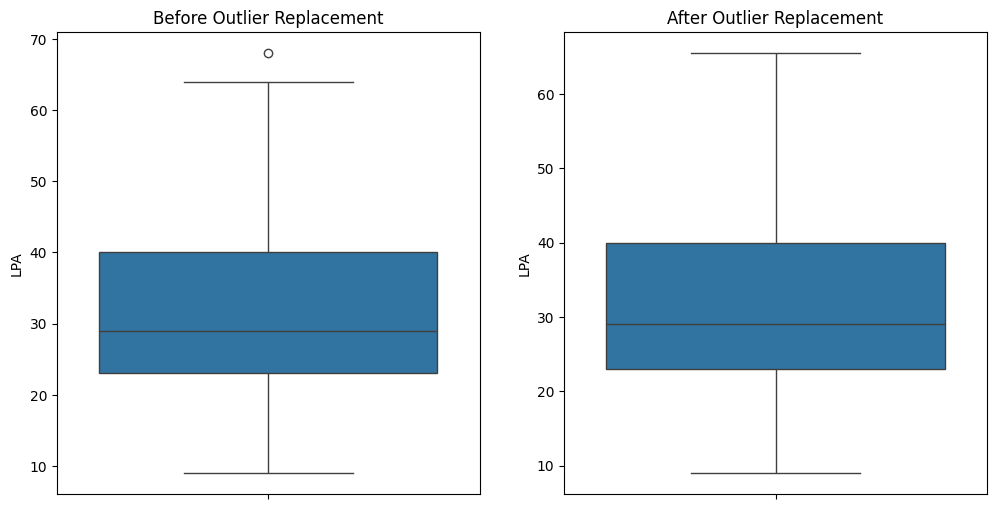

2024-12-30 06:11:27,824 - INFO - Replaced outliers in 'LPA' with thresholds: -2.5, 65.5
2024-12-30 06:11:27,824 - INFO - Outlier replacement completed for LPA.
2024-12-30 06:11:27,824 - INFO - No significant outliers detected in WI. No replacement necessary.
2024-12-30 06:11:27,824 - INFO - No significant outliers detected in PAS. No replacement necessary.


In [8]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
def outlier_thresholds(dataframe, col_name, q1, q3, multiplier):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + multiplier * interquantile_range
    low_limit = quartile1 - multiplier * interquantile_range
    return low_limit, up_limit
def check_outlier(dataframe, col_name, q1, q3, multiplier):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3, multiplier)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def calculate_all_outlier_thresholds(dataframe, q1, q3, multiplier):
    thresholds = {}
    for col in dataframe.columns:
        if dataframe[col].dtype in ['int64', 'float64']:  # Numeric columns
            thresholds[col] = outlier_thresholds(dataframe, col, q1, q3, multiplier)
    return thresholds
def visualize_outlier_replacement(dataframe, variable, q1, q3, multiplier):
    # Calculate thresholds
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3, multiplier)
    
    # Plot before replacement
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=dataframe[variable])
    plt.title('Before Outlier Replacement')
    
    # Replace outliers
    dataframe_temp = dataframe.copy()  # Creating a copy to preserve original
    dataframe_temp[variable] = dataframe_temp[variable].clip(lower=low_limit, upper=up_limit)
    
    # Plot after replacement
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataframe_temp[variable])
    plt.title('After Outlier Replacement')
    
    plt.show()

def integrated_outlier_management(dataframe, q1=0.25, q3=0.75, multiplier=1.5):
    # Calculate thresholds for numeric columns only
    all_thresholds = calculate_all_outlier_thresholds(dataframe.select_dtypes(include=['float64', 'int64']), q1, q3, multiplier)
    
    for col in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        low_limit, up_limit = all_thresholds[col]
        
        # Now your check_outlier function needs to be called with just 'col' as it doesn't use low_limit and up_limit directly
        if check_outlier(dataframe, col, q1, q3, multiplier):
            logging.info(f'Outliers detected in {col}. Proceeding with analysis and replacement.')
            
            # Visualize outliers before replacement
            visualize_outlier_replacement(dataframe, col, q1, q3, multiplier)
            
            # Replace outliers and log the process
            dataframe[col] = dataframe[col].clip(lower=low_limit, upper=up_limit)
            logging.info(f"Replaced outliers in '{col}' with thresholds: {low_limit}, {up_limit}")
            
            logging.info(f'Outlier replacement completed for {col}.')
        else:
            logging.info(f'No significant outliers detected in {col}. No replacement necessary.')

integrated_outlier_management(df_)